In [4]:
#import libraries 
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<span style="color:lightblue; font-size:22px"><b>1. CHECKING DATA SET</b></span>

In [5]:
#set pandas output display size
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [6]:
#load data and display first 50 rows
df = pd.read_csv('/Users/esterbleskadit/Neuefische/capstone-WiDS-datathon-2024/data/training.csv')
print(f'Shape: {df.shape}')

df.head(50)

Shape: (12906, 83)


,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,...,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,NaN,NaN,West,Pacific,31437.750000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,...,3.257143,11.614286,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,NaN,NaN,West,Pacific,39121.878790,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,...,12.245455,35.984848,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,C773,NaN,NaN,South,West South Central,21996.683330,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,11.426667,...,10.115000,29.793333,37.308475,66.428333,4.560000,13.722034,3.650847,75.820000,9.231667,3.618333,0.463333,0.146667,3.816667,6.898333,19.370000,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,C773,NaN,NaN,West,Pacific,32795.325580,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,12.280952,...,22.459524,55.745238,48.938095,64.430952,5.264286,18.502381,0.052381,65.014286,1.438095,18.845238,0.430952,0.252381,5.428571,8.611905,16.716667,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C773,NaN,NaN,West,Mountain,10886.260000,116.886000,43.473469,10.824000,13.976000,9.492000,10.364000,12.600000,14.992000,14.836000,...,5.684000,19.662000,42.332653,57.488000,4.258000,13.029545,6.890909,86.712000,0.426000,0.656000,0.760000,0.108000,5.080000,6.258000,13.334000,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
5,111545,White,MEDICARE ADVANTAGE,NY,141,66,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C7981,NaN,NaN,Northeast,Middle Atlantic,5643.771429,219.362857,45.180000,8.511429,14.857143,11.088571,9.754286,13.614286,13.374286,15.685714,...,9.865714,25.740000,43.081250,60.934286,3.882857,7.070968,1.645161,93.528571,1.031429,0.422857,0.742857,0.002857,1.000000,3.262857,2.465714,13.717143,8.888235,0.638235,25.000000,4.797143,7.745714,40.107248,6.181812,13.562528,0
6,914071,NaN,COMMERCIAL,CA,900,51,F,29.05,C50912,Malignant neoplasm of unspecified site of left...,C779,NaN,NaN,West,Pacific,36054.117650,5294.330882,36.653846,9.761538,11.267692,17.233846,17.441538,13.090769,12.304615,9.407692,...,13.689231,37.575385,41.748438,64.387692,8.683077,21.233333,0.006349,42.824615,12.216923,12.703077,1.120000,0.146154,22.135385,8.850769,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261,1
7,479368,White,COMMERCI

In [7]:
#display dataframe information
df.info

<bound method DataFrame.info of        patient_id patient_race  payer_type patient_state  patient_zip3  \
0          475714          NaN    MEDICAID            CA           924   
1          349367        White  COMMERCIAL            CA           928   
2          138632        White  COMMERCIAL            TX           760   
3          617843        White  COMMERCIAL            CA           926   
4          817482          NaN  COMMERCIAL            ID           836   
...           ...          ...         ...           ...           ...   
12901      674178        White         NaN            OH           436   
12902      452909          NaN  COMMERCIAL            CA           945   
12903      357486          NaN  COMMERCIAL            CA           926   
12904      935417          NaN         NaN            NY           112   
12905      179597     Hispanic    MEDICAID            FL           336   

       patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0     

In [8]:
#list dataframe column names
df.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [9]:
#display descriptive statistic for all columns
for column in df.columns:
    print(f"{column}: {df[column].describe().T}")

patient_id: count     12906.000000
mean     547381.196033
std      260404.959974
min      100063.000000
25%      321517.000000
50%      543522.000000
75%      772671.750000
max      999896.000000
Name: patient_id, dtype: float64
patient_race: count      6521
unique        5
top       White
freq       3588
Name: patient_race, dtype: object
payer_type: count          11103
unique             3
top       COMMERCIAL
freq            6032
Name: payer_type, dtype: object
patient_state: count     12855
unique       50
top          CA
freq       2438
Name: patient_state, dtype: object


patient_zip3: count    12906.000000
mean       573.754300
std        275.447534
min        101.000000
25%        331.000000
50%        554.000000
75%        846.000000
max        999.000000
Name: patient_zip3, dtype: float64
patient_age: count    12906.000000
mean        59.183326
std         13.335216
min         18.000000
25%         50.000000
50%         59.000000
75%         67.000000
max         91.000000
Name: patient_age, dtype: float64
patient_gender: count     12906
unique        1
top           F
freq      12906
Name: patient_gender, dtype: object
bmi: count    3941.000000
mean       28.984539
std         5.696906
min        14.000000
25%        24.660000
50%        28.190000
75%        32.920000
max        85.000000
Name: bmi, dtype: float64
breast_cancer_diagnosis_code: count     12906
unique       50
top        1749
freq       1982
Name: breast_cancer_diagnosis_code, dtype: object
breast_cancer_diagnosis_desc: count                                                 12906
uni

<span style="color:lightblue; font-size:22px"><b>1. DATA CLEANING</b></span>

<span style="color:lightblue; font-size:15px"><b>2.1 OVERVIEW MISSING DATA</b></span>

In [10]:
#summary information dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [11]:
#find duplicate rows in the dataframe
df[df.duplicated()]

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,...,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D


In [12]:
#display count of missing values per column in descending order
print('Count of missing values by column (decending)')
print('-----'*15)
print(df.isnull().sum().sort_values(ascending=False).to_string())

Count of missing values by column (decending)
---------------------------------------------------------------------------
metastatic_first_novel_treatment         12882
metastatic_first_novel_treatment_type    12882
bmi                                       8965
patient_race                              6385
payer_type                                1803
Region                                      52
Division                                    52
patient_state                               51
N02                                         29
PM25                                        29
Ozone                                       29
income_household_25_to_35                    4
income_household_15_to_20                    4
income_household_35_to_50                    4
income_household_20_to_25                    4
limited_english                              4
income_household_10_to_15                    4
income_household_75_to_100                   4
income_household_under_5        

<Axes: >

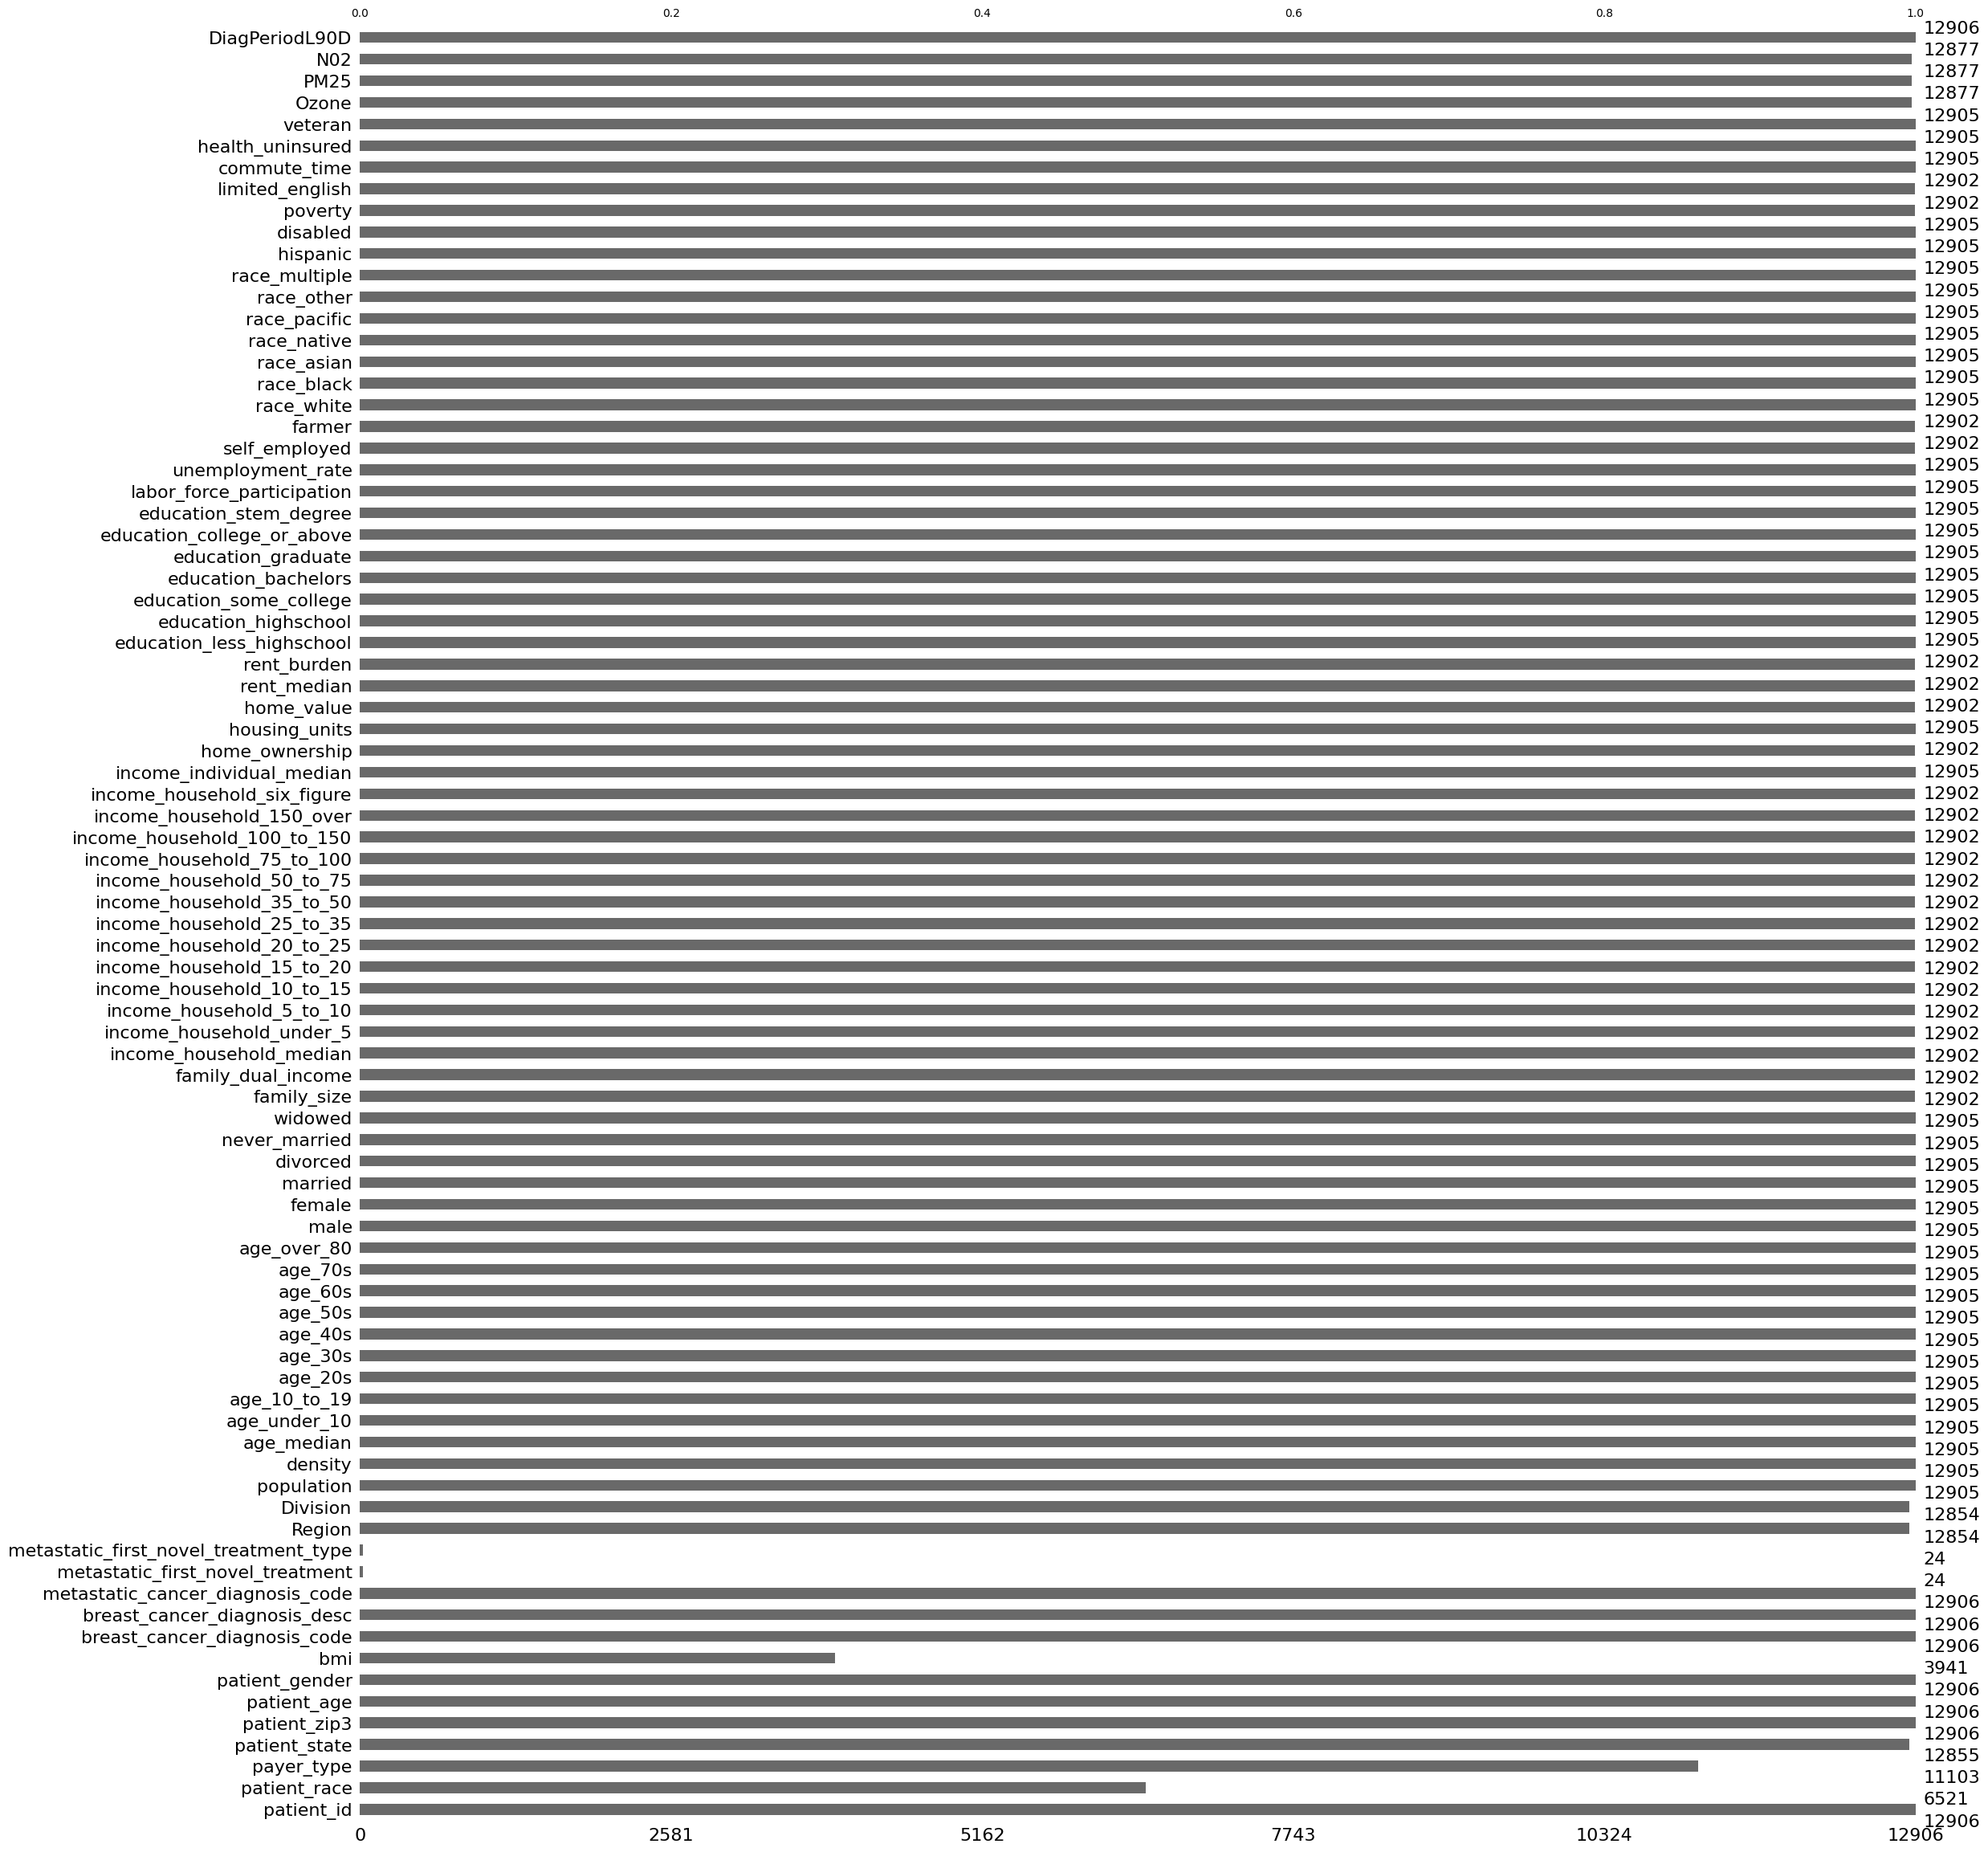

In [13]:
#visualize missing data patterns in the dataframe using a bar chart
msno.bar(df)

In [14]:
#display percentage of missing values per column (top 11, descending)
print('Top 11 columns by missing value percentage (descending)')
print('-----'*15)
print(round(df.isnull().mean() * 100, 2).sort_values(ascending=False).head(11))

Top 11 columns by missing value percentage (descending)
---------------------------------------------------------------------------
metastatic_first_novel_treatment         99.81
metastatic_first_novel_treatment_type    99.81
bmi                                      69.46
patient_race                             49.47
payer_type                               13.97
patient_state                             0.40
Region                                    0.40
Division                                  0.40
N02                                       0.22
PM25                                      0.22
Ozone                                     0.22
dtype: float64


<span style="color:lightblue; font-size:15px"><b>2.2 HANDLE MISSING DATA </b></span>

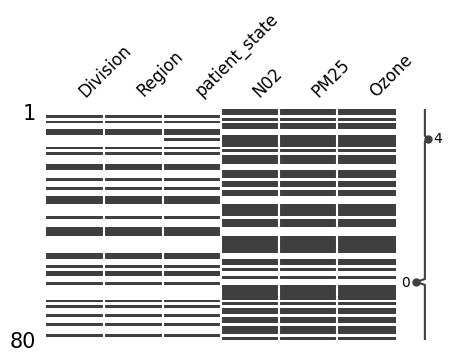

In [15]:
#visualize missing data pattern for selected columns
df_six_cols_with_missings = df[['Division', 'Region', 'patient_state', 'N02', 'PM25', 'Ozone']]
null_data = df_six_cols_with_missings[df_six_cols_with_missings.isnull().any(axis=1)]
msno.matrix(null_data, figsize=(5,3), fontsize=12);

In [16]:
#make a copy of the dataframe to preserve original data
df_original = df.copy(deep=True)

#drop columns with mostly missing values
df.drop(labels=['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'bmi', 'patient_race'], axis=1, inplace=True)

#drop rows where 'payer_type' is missing
df.dropna(axis=0, subset='payer_type', inplace=True)

#reset dataframe index after row drops
df.reset_index(drop=True, inplace=True)

In [17]:
#dsiplay top 20 columns by missing value count
print('Absolute number of missing values per column (descending order)')
print('-----'*15)
df.isnull().sum().sort_values(ascending=False).head(20)

Absolute number of missing values per column (descending order)
---------------------------------------------------------------------------


Region                         34
Division                       34
patient_state                  33
N02                            23
PM25                           23
Ozone                          23
income_household_50_to_75       4
poverty                         4
income_household_35_to_50       4
income_household_25_to_35       4
income_household_20_to_25       4
income_household_5_to_10        4
income_household_10_to_15       4
income_household_75_to_100      4
income_household_under_5        4
income_household_median         4
limited_english                 4
income_household_six_figure     4
income_household_100_to_150     4
income_household_150_over       4
dtype: int64

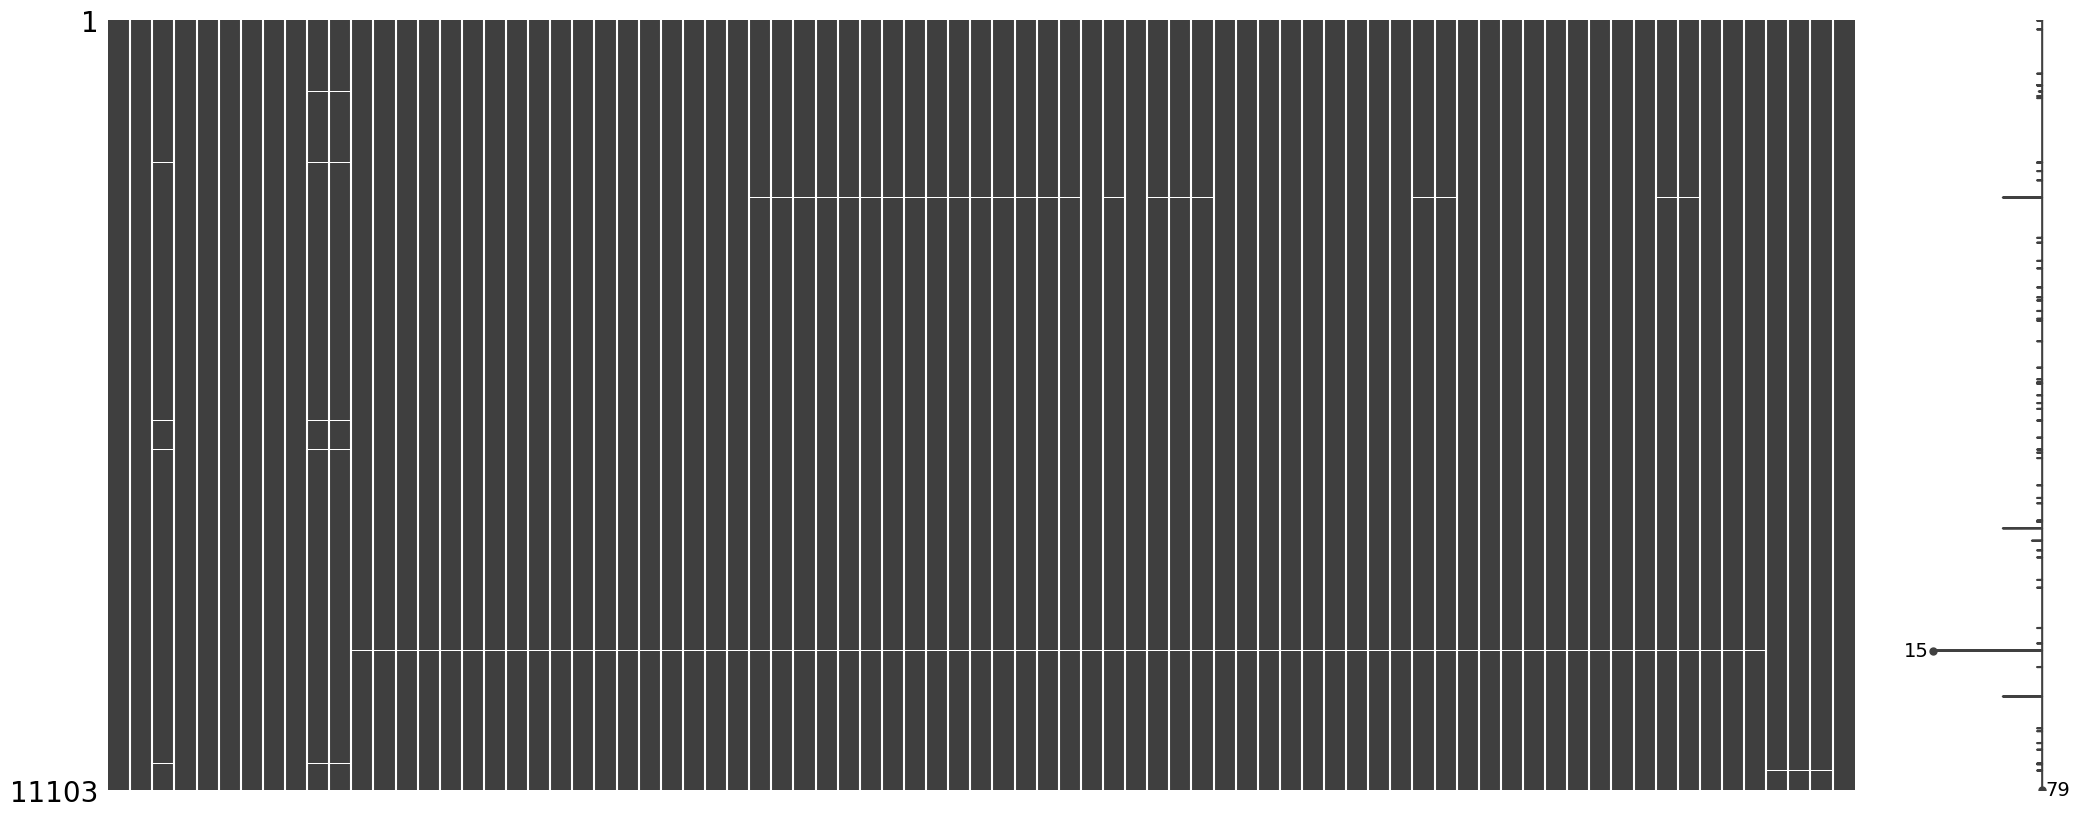

In [18]:
#visualize missing data structure
msno.matrix(df)
plt.show()

In [19]:
#show top 20 rows with the most missing values
df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

9091     64
9753     23
2559     23
7329     23
7507      6
774       3
5410      3
6891      3
939       3
2311      3
5242      3
6022      3
3211      3
1096      3
3855      3
5238      3
4334      3
6316      3
10425     3
2054      3
dtype: int64

In [20]:
#drop rows with more than 22 missing values
df.dropna(thresh=df.shape[1]-22, inplace=True)

#reset index after dropping rows
df.reset_index(drop=True, inplace=True)

#display basic dataframe information
print('Updated DataFrame Summary Post Missing Row Removal')
print('-----'*15)
display(df.info(verbose=False))

#show remaining missing values per column (top 15)
print('Top 15 Columns by Remaining Missing Values')
print('-----'*15)
display(df.isnull().sum().sort_values(ascending=False).head(15))

Updated DataFrame Summary Post Missing Row Removal
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Columns: 79 entries, patient_id to DiagPeriodL90D
dtypes: float64(67), int64(4), object(8)
memory usage: 6.7+ MB


None

Top 15 Columns by Remaining Missing Values
---------------------------------------------------------------------------


Region                        34
Division                      34
patient_state                 33
N02                           23
PM25                          23
Ozone                         23
patient_id                     0
education_less_highschool      0
education_stem_degree          0
education_college_or_above     0
education_graduate             0
education_bachelors            0
education_some_college         0
education_highschool           0
housing_units                  0
dtype: int64

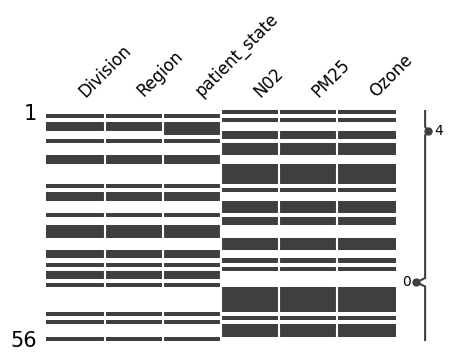

In [21]:
#visualize missing data pattern for selected columns using missingno matrix
df_six_cols_with_missings = df[['Division', 'Region', 'patient_state', 'N02', 'PM25', 'Ozone']]
null_data = df_six_cols_with_missings[df_six_cols_with_missings.isnull().any(axis=1)]
msno.matrix(null_data, figsize=(5,3), fontsize=12);

<span style="color:lightblue; font-size:15px"><b>2.3 IMPUTATION </b></span>


<span style="color:lightblue; font-size:13px"><b>2.3.1 REGIONAL FEATURES </b></span>

In [22]:
#find rows with missing regional information
df_regional = df[['patient_zip3', 'Division', 'Region', 'patient_state']]
missing_regional = df_regional[df_regional.isnull().any(axis=1)]

#get ZIP3 codes where regional data is missing
zip_miss_region = sorted (missing_regional.patient_zip3.sort_values().unique())

#check missing values in Division, Region, and patient_state
print("Missing Values in Regional Features")
print("-" * 40) 
print(f" - Data Shape: {missing_regional.shape}")
print(f" - Count of Unique ZIP3s: {missing_regional.patient_zip3.nunique()}")
print(f" - ZIP3 Codes with Missing Regional Info:\n{zip_miss_region}")

Missing Values in Regional Features
----------------------------------------
 - Data Shape: (34, 4)
 - Count of Unique ZIP3s: 31
 - ZIP3 Codes with Missing Regional Info:
[117, 148, 157, 181, 294, 300, 322, 324, 331, 335, 338, 347, 454, 601, 662, 666, 711, 779, 781, 853, 900, 902, 913, 930, 953, 968, 970, 972, 973, 974, 975]


In [23]:
#count unique Regions, Divisions, and States per ZIP3
uni_reg_zip = []
uni_div_zip = []
uni_state_zip = []

for z in zip_miss_region:
    uni_reg_zip.append(df.query('patient_zip3 == @z')['Region'].nunique())
    uni_div_zip.append(df.query('patient_zip3 == @z')['Division'].nunique())
    uni_state_zip.append(df.query('patient_zip3 == @z')['patient_state'].nunique())

#count unique Regions, Divisions, and States per ZIP3
zip_summary = pd.DataFrame({
    'ZIP3': zip_miss_region,
    'Unique Regions': uni_reg_zip,
    'Unique Divisions': uni_div_zip,
    'Unique States': uni_state_zip
})

In [24]:
#display full summary of unique regional values by ZIP3
print("Summary of Unique Values per ZIP3")
print("-" * 40) 
print(zip_summary.to_string(index=False))

Summary of Unique Values per ZIP3
----------------------------------------
 ZIP3  Unique Regions  Unique Divisions  Unique States
  117               2                 2              3
  148               1                 1              1
  157               1                 1              1
  181               1                 1              2
  294               1                 1              1
  300               1                 2              2
  322               1                 1              1
  324               1                 1              1
  331               1                 1              1
  335               1                 1              1
  338               1                 1              1
  347               3                 3              3
  454               1                 1              1
  601               2                 2              3
  662               1                 1              1
  666               1                 1      

In [25]:
#classify ZIP3s by Uniqueness of Regional Assignments
n_all_one = zip_summary.query('`Unique Regions` == 1 and `Unique Divisions` == 1 and `Unique States` == 1')
n_more_one = zip_summary.query('`Unique Regions` > 1 or `Unique Divisions` > 1 or `Unique States` > 1')

#analyzing regional consistency per ZIP3
print("\nRegional Consistency per ZIP3")
print("-" * 60) 
print(f"Number of ZIP3s with consistent regional assignment: {len(n_all_one)}")
print(f"Number of ZIP3s with ambiguous regional mapping: {len(n_more_one)}")
print(f"Confidence rate for ZIP3-based regional inference: {(len(n_all_one) / len(zip_summary)) * 100:.2f}%")


Regional Consistency per ZIP3
------------------------------------------------------------
Number of ZIP3s with consistent regional assignment: 19
Number of ZIP3s with ambiguous regional mapping: 12
Confidence rate for ZIP3-based regional inference: 61.29%


In [26]:
#identify missing regional data entries for specified ZIP3 codes
def index_missings(zipcodes, query='reg'):
    col_map = {'reg': 'Region', 'div': 'Division', 'sta': 'patient_state'}
    col = col_map.get(query)
    
    if col is None:
        return []

#identify rows with missing values in a given regional feature
    return df[df[col].isna() & df['patient_zip3'].isin(zipcodes)].index.tolist()

    flat_idx = [item for sublist in idx for item in sublist]
    return flat_idx

In [27]:
#identify missing entries for each regional feature (Region, Division, State)
idx_region = index_missings(n_more_one['ZIP3'], 'reg')
idx_division = index_missings(n_more_one['ZIP3'], 'div')
idx_state = index_missings(n_more_one['ZIP3'], 'sta')

In [28]:
#consistency check: missing indices for Region, Division, and State
print(idx_region.sort()==idx_division.sort())
print(idx_region.sort()==idx_state.sort())
print(idx_division.sort()==idx_state.sort())

True
True
True


In [29]:
#check if sorted missing indices are equal across Region, Division and State
print(idx_region.sort()==idx_division.sort())
print(idx_region.sort()==idx_state.sort())
print(idx_division.sort()==idx_state.sort())

True
True
True


In [30]:
#ZIP3s with multiple regional values 
n_more_one

,ZIP3,Unique Regions,Unique Divisions,Unique States
0,117,2,2,3
3,181,1,1,2
5,300,1,2,2
11,347,3,3,3
13,601,2,2,3
19,853,3,3,4
20,900,2,2,4
21,902,2,2,2
22,913,2,3,3
24,953,1,1,2


In [31]:
#verify missing region data for selected ZIP3 indices
df.loc[idx_region,['Region','patient_zip3']]

,Region,patient_zip3
774,NaN,117
1030,NaN,181
2057,NaN,853
3472,NaN,300
3579,NaN,347
3996,NaN,953
5178,NaN,601
6707,NaN,913
6966,NaN,601
7505,NaN,968


In [32]:
#drop rows with missing region and show top missing counts
df.drop(index=idx_region, inplace=True)
df.isnull().sum().sort_values(ascending=False).head(7)

N02              22
PM25             22
Ozone            22
patient_state    20
Region           20
Division         20
patient_id        0
dtype: int64

In [33]:
#impute missing regional data
df['Region'] = df['Region'].fillna(df.groupby(['patient_zip3'])['Region'].transform('first'))
df['Division'] = df['Division'].fillna(df.groupby(['patient_zip3'])['Division'].transform('first'))
df['patient_state'] = df['patient_state'].fillna(df.groupby(['patient_zip3'])['patient_state'].transform('first'))

#verify remaining missing values
df.isnull().sum().sort_values(ascending=False).head(7)

N02                           22
PM25                          22
Ozone                         22
patient_id                     0
rent_burden                    0
education_stem_degree          0
education_college_or_above     0
dtype: int64


<span style="color:lightblue; font-size:13px"><b>2.3.2 EVIRONMENTAL FEATURES </b></span>

In [34]:
#missing environmental data summary
df_envir = df[['patient_state','patient_zip3','Region','Division','N02','PM25','Ozone']]
missing_envir = df_envir[df_envir.isnull().any(axis=1)]

#show shape, number of unique states and the unique states
print("Missing Environmental Data Summary")
print("-" * 50) 
print(f'Shape of missing environmental data: {missing_envir.shape}')
print(f'Number of unique zip-codes with missing data: {missing_envir.patient_zip3.nunique()}')
print(f'Unique states with missing data: {missing_envir.patient_state.unique()}')

Missing Environmental Data Summary
--------------------------------------------------
Shape of missing environmental data: (22, 7)
Number of unique zip-codes with missing data: 5
Unique states with missing data: ['HI' 'AK' 'TN']


In [35]:
#checking missing enviromental features 
missing_envir

,patient_state,patient_zip3,Region,Division,N02,PM25,Ozone
135,HI,967,West,Pacific,NaN,NaN,NaN
939,AK,998,West,Pacific,NaN,NaN,NaN
942,TN,968,South,East South Central,NaN,NaN,NaN
1125,HI,968,West,Pacific,NaN,NaN,NaN
2311,HI,967,West,Pacific,NaN,NaN,NaN
3140,HI,967,West,Pacific,NaN,NaN,NaN
4042,HI,967,West,Pacific,NaN,NaN,NaN
4307,HI,967,West,Pacific,NaN,NaN,NaN
4333,HI,967,West,Pacific,NaN,NaN,NaN
5222,HI,968,West,Pacific,NaN,NaN,NaN


In [36]:
#get mean values for each zip-code and environmental feature
df_miss_mean = pd.DataFrame()
len_frame = len(missing_envir['patient_zip3'].unique())

df_miss_mean['zip'] = missing_envir['patient_zip3'].unique()
df_miss_mean['avg_PM25'] = np.ones(len_frame)
df_miss_mean['avg_Ozone'] = np.ones(len_frame)

for z in df_miss_mean.zip:
    for i in range(len(df_miss_mean.zip)):
        df_miss_mean.loc[i,'avg_N02'] = df.query("patient_zip3==@z")['N02'].mean()
        df_miss_mean.loc[i,'avg_PM25'] = df.query("patient_zip3==@z")['PM25'].mean()
        df_miss_mean.loc[i,'avg_Ozone'] =df.query("patient_zip3==@z")['Ozone'].mean()

In [37]:
#display the mean of environmental feature by ZIP
print("MEAN ENVIRONMENTAL FEATURES BY ZIP")
print("-"*40)
print(df_miss_mean)

MEAN ENVIRONMENTAL FEATURES BY ZIP
----------------------------------------
   zip  avg_PM25  avg_Ozone  avg_N02
0  967       NaN        NaN      NaN
1  998       NaN        NaN      NaN
2  968       NaN        NaN      NaN
3  996       NaN        NaN      NaN
4  995       NaN        NaN      NaN


In [38]:
#calculate mean environmental feature values by zip code
df_miss_mean = df.groupby('patient_zip3')[['N02', 'PM25', 'Ozone']].mean().reset_index()
df_miss_mean.rename(columns={'patient_zip3': 'zip', 'N02': 'avg_N02', 'PM25': 'avg_PM25', 'Ozone': 'avg_Ozone'}, inplace=True)
df_miss_mean

#display the mean of environmental features by zip code
print("MEAN ENVIRONMENTAL FEATURES BY ZIP CODE")
print("-"*40)
print(df_miss_mean)

MEAN ENVIRONMENTAL FEATURES BY ZIP CODE
----------------------------------------
     zip    avg_N02  avg_PM25  avg_Ozone
0    101   4.131900  4.178836  39.476275
1    103  22.112395  7.299229  38.718935
2    104  29.089314  7.426677  36.555194
3    105  20.973690  6.634648  39.286219
4    106  19.413762  6.642263  39.302792
..   ...        ...       ...        ...
719  993   7.497134  4.550081  40.200097
720  994   6.135070  3.317587  39.796194
721  995        NaN       NaN        NaN
722  996        NaN       NaN        NaN
723  998        NaN       NaN        NaN

[724 rows x 4 columns]


In [39]:
#drop rows with missing data
df.dropna(axis=0, inplace=True)

#reindex dataframe
df.reset_index(drop=True, inplace=True)

In [40]:
#display brief summary of dataframe structure
print('Brief DataFrame Info')
print('-----'*10)
df.info(verbose=False)

Brief DataFrame Info
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11063 entries, 0 to 11062
Columns: 79 entries, patient_id to DiagPeriodL90D
dtypes: float64(67), int64(4), object(8)
memory usage: 6.7+ MB


<span style="color:lightblue; font-size:22px"><b>3. UNDERSTAND DATA </b></span>

In [41]:
#display detailed information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11063 entries, 0 to 11062
Data columns (total 79 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        11063 non-null  int64  
 1   payer_type                        11063 non-null  object 
 2   patient_state                     11063 non-null  object 
 3   patient_zip3                      11063 non-null  int64  
 4   patient_age                       11063 non-null  int64  
 5   patient_gender                    11063 non-null  object 
 6   breast_cancer_diagnosis_code      11063 non-null  object 
 7   breast_cancer_diagnosis_desc      11063 non-null  object 
 8   metastatic_cancer_diagnosis_code  11063 non-null  object 
 9   Region                            11063 non-null  object 
 10  Division                          11063 non-null  object 
 11  population                        11063 non-null  float64
 12  dens

In [42]:
#for each categorical (object) column, print the number of unique values and list those unique values
for i in df.select_dtypes(include=object).columns.tolist():
    print(f'Number of unique values in', i ,':', df[i].nunique(), '\n' ,
            df[i].unique(), '\n')

Number of unique values in payer_type : 3 
 ['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE'] 

Number of unique values in patient_state : 47 
 ['CA' 'TX' 'ID' 'NY' 'IL' 'OR' 'MI' 'MT' 'KY' 'OH' 'IN' 'FL' 'GA' 'VA'
 'MD' 'KS' 'NM' 'WA' 'MN' 'NC' 'PA' 'CO' 'AL' 'WI' 'LA' 'IA' 'TN' 'NE'
 'AZ' 'MO' 'NV' 'SD' 'DC' 'AR' 'UT' 'WV' 'OK' 'WY' 'SC' 'DE' 'MS' 'NJ'
 'RI' 'CT' 'ND' 'NH' 'MA'] 

Number of unique values in patient_gender : 1 
 ['F'] 

Number of unique values in breast_cancer_diagnosis_code : 48 
 ['C50919' 'C50411' 'C50112' 'C50212' '1749' 'C50912' 'C50512' '1744'
 'C50412' 'C50812' 'C50911' 'C50312' 'C50311' '1741' 'C5091' 'C50811'
 '1748' 'C50511' '1743' 'C50211' 'C50011' 'C5051' 'C50012' 'C50111'
 'C50419' '1742' 'C50611' 'C50612' 'C50119' 'C50819' '1746' 'C5041'
 'C50619' '19881' 'C5081' '1745' 'C50219' 'C50319' 'C50019' 'C50021'
 'C5021' 'C50519' 'C50929' 'C509' 'C50' '1759' 'C5011' 'C50421'] 

Number of unique values in breast_cancer_diagnosis_desc : 48 
 ['Malignant neoplasm of 

In [43]:
#drop patient_gender
df.drop(labels='patient_gender', axis=1, inplace=True)

<span style="color:lightblue; font-size:18px"><b>3.1 ICD-DIAGNOSIS-CODES </b></span>

In [44]:
#verify the mapping between each unique breast cancer diagnosis code and its corresponding descriptions
uni_code = df.breast_cancer_diagnosis_code.unique()
uni_desc = df.breast_cancer_diagnosis_desc.unique()

desc = list()
for i in range(len(uni_code)):
    desc = df.query('breast_cancer_diagnosis_code==@uni_code[@i]').breast_cancer_diagnosis_desc.unique()
    print(f'Code {uni_code[i]}\nDescription: {desc}\n')

Code C50919
Description: ['Malignant neoplasm of unsp site of unspecified female breast']

Code C50411
Description: ['Malig neoplm of upper-outer quadrant of right female breast']

Code C50112
Description: ['Malignant neoplasm of central portion of left female breast']

Code C50212
Description: ['Malig neoplasm of upper-inner quadrant of left female breast']

Code 1749
Description: ['Malignant neoplasm of breast (female), unspecified']

Code C50912
Description: ['Malignant neoplasm of unspecified site of left female breast']

Code C50512
Description: ['Malig neoplasm of lower-outer quadrant of left female breast']

Code 1744
Description: ['Malignant neoplasm of upper-outer quadrant of female breast']

Code C50412
Description: ['Malig neoplasm of upper-outer quadrant of left female breast']

Code C50812
Description: ['Malignant neoplasm of ovrlp sites of left female breast']

Code C50911
Description: ['Malignant neoplasm of unsp site of right female breast']

Code C50312
Description: ['

In [45]:
#remove breast_cancer_diagnosis_desc feature
df.drop(labels='breast_cancer_diagnosis_desc', axis=1, inplace=True)

In [46]:
#identify indices of rows with invalid diagnosis codes "1759" and "19881"
idx_wrong_code = df.query('breast_cancer_diagnosis_code=="1759" or breast_cancer_diagnosis_code=="19881"').index.values
idx_wrong_code

array([ 1056,  4163,  4660,  6588,  8192,  8874,  9101,  9498, 10587,
       10851])

In [47]:
#remove rows that contained invalid breast cancer diagnosis codes
df.drop(index=idx_wrong_code, inplace=True)

#reindex DataFrame to keep index sequential after row removal
df.reset_index(drop=True, inplace=True)

#confirm that no rows with the invalid codes remain (expecting an empty array)
df.query('breast_cancer_diagnosis_code=="1759" or breast_cancer_diagnosis_code=="19881"').index.values

array([], dtype=int64)

In [48]:
#convert ICD-9 breast cancer diagnosis codes to standardized ICD-10 codes using string replacements
df.breast_cancer_diagnosis_code = df.breast_cancer_diagnosis_code.str.replace('1741', 'C50119')
df.breast_cancer_diagnosis_code = df.breast_cancer_diagnosis_code.str.replace('1742', 'C50219')
df.breast_cancer_diagnosis_code = df.breast_cancer_diagnosis_code.str.replace('1743', 'C50319')
df.breast_cancer_diagnosis_code = df.breast_cancer_diagnosis_code.str.replace('1744', 'C50419')
df.breast_cancer_diagnosis_code = df.breast_cancer_diagnosis_code.str.replace('1745', 'C50519')
df.breast_cancer_diagnosis_code = df.breast_cancer_diagnosis_code.str.replace('1746', 'C50619')
df.breast_cancer_diagnosis_code = df.breast_cancer_diagnosis_code.str.replace('1748', 'C50819')
df.breast_cancer_diagnosis_code = df.breast_cancer_diagnosis_code.str.replace('1749', 'C50919')
df.breast_cancer_diagnosis_code = df.breast_cancer_diagnosis_code.str.replace('1759', 'C50919')

#display unique updated diagnosis codes and count total unique codes
display(df.breast_cancer_diagnosis_code.unique())
print('Number of unique breast cancer codes: ', df.breast_cancer_diagnosis_code.nunique())

array(['C50919', 'C50411', 'C50112', 'C50212', 'C50912', 'C50512',
       'C50419', 'C50412', 'C50812', 'C50911', 'C50312', 'C50311',
       'C50119', 'C5091', 'C50811', 'C50819', 'C50511', 'C50319',
       'C50211', 'C50011', 'C5051', 'C50012', 'C50111', 'C50219',
       'C50611', 'C50612', 'C50619', 'C5041', 'C5081', 'C50519', 'C50019',
       'C50021', 'C5021', 'C50929', 'C509', 'C50', 'C5011', 'C50421'],
      dtype=object)

Number of unique breast cancer codes:  38


In [49]:
#count the frequency of each breast cancer diagnosis code in the dataframe
df.breast_cancer_diagnosis_code.value_counts()

breast_cancer_diagnosis_code
C50919    2990
C50911    1479
C50912    1405
C50411     849
C50412     777
C50811     439
C50419     393
C50812     363
C50819     323
C50212     256
C50211     243
C50511     178
C50112     178
C50111     171
C50512     154
C50312     134
C50311     124
C50219      98
C50119      93
C50011      92
C50012      91
C50519      68
C50319      45
C50612      21
C50611      20
C5091       19
C50619      13
C50019      11
C5041        7
C5081        6
C5021        3
C509         3
C50929       2
C50          1
C5011        1
C5051        1
C50021       1
C50421       1
Name: count, dtype: int64

In [50]:
#calculate the length of each diagnosis code string and add it as a new column 'len_code'
df['len_code'] = df.breast_cancer_diagnosis_code.str.len()

#display the current dimensions of the DataFrame to verify data size after modification
df.shape

(11053, 78)

In [51]:
#identify rows where the diagnosis code length is less than 5 and remove them from the DataFrame
df.drop(index=df.query('len_code <= 4').index.values, axis=0, inplace=True)

#remove the 'len_code' column as it is no longer needed
df.drop(labels='len_code', axis=1, inplace=True)

#reset the DataFrame index after row deletions to maintain a clean sequential index
df.reset_index(drop=True, inplace=True)

#display the dataframe shape again to confirm the changes
df.shape

(11049, 77)

In [52]:
#simplify diagnosis codes by trimming the last character from codes with length 6 or more
df['breast_cancer_diagnosis_code'] = df['breast_cancer_diagnosis_code'].apply(lambda x: x if len(x) < 6 else x[:-1])

#verify the updated set of unique diagnosis codes and count how many remain
print('Unique cancer codes left: ', df.breast_cancer_diagnosis_code.unique())
print('Number of unique cancer codes left: ', df.breast_cancer_diagnosis_code.nunique())

Unique cancer codes left:  ['C5091' 'C5041' 'C5011' 'C5021' 'C5051' 'C5081' 'C5031' 'C5001' 'C5061'
 'C5002' 'C5092' 'C5042']
Number of unique cancer codes left:  12


In [53]:
#count the frequency of each unique breast cancer diagnosis code in the DataFrame
df.breast_cancer_diagnosis_code.value_counts()

breast_cancer_diagnosis_code
C5091    5893
C5041    2026
C5081    1131
C5021     600
C5011     443
C5051     401
C5031     303
C5001     194
C5061      54
C5092       2
C5002       1
C5042       1
Name: count, dtype: int64

In [54]:
#remove rows corresponding to male breast cancer diagnosis codes from the dataframe
df.drop(index=df.query('breast_cancer_diagnosis_code=="C5002" or breast_cancer_diagnosis_code=="C5042" or breast_cancer_diagnosis_code=="C5092"').index.values,
        axis=0, inplace=True)

#reset the DataFrame index to maintain sequential numbering after row removal
df.reset_index(drop=True, inplace=True)

#recalculate and display the frequency of each remaining diagnosis code
df.breast_cancer_diagnosis_code.value_counts()

breast_cancer_diagnosis_code
C5091    5893
C5041    2026
C5081    1131
C5021     600
C5011     443
C5051     401
C5031     303
C5001     194
C5061      54
Name: count, dtype: int64

In [55]:
#print the total number of unique metastatic cancer diagnosis codes
print(df.metastatic_cancer_diagnosis_code.nunique())

#display all unique metastatic cancer diagnosis codes in sorted order
df.metastatic_cancer_diagnosis_code.sort_values().unique()

43


array(['C770', 'C771', 'C772', 'C773', 'C774', 'C775', 'C778', 'C779',
       'C7800', 'C7801', 'C7802', 'C781', 'C782', 'C7830', 'C7839',
       'C784', 'C785', 'C786', 'C787', 'C7880', 'C7889', 'C7900', 'C7901',
       'C7910', 'C7911', 'C7919', 'C792', 'C7931', 'C7932', 'C7940',
       'C7949', 'C7951', 'C7952', 'C7960', 'C7961', 'C7962', 'C7970',
       'C7971', 'C7972', 'C7981', 'C7982', 'C7989', 'C799'], dtype=object)

In [56]:
#count and display the occurrences of each metastatic cancer diagnosis code, sorted by code
df.metastatic_cancer_diagnosis_code.sort_values().value_counts()

metastatic_cancer_diagnosis_code
C773     6101
C7951    1541
C779      666
C7981     398
C7800     342
C787      294
C7989     288
C799      244
C7931     229
C792      147
C771      132
C7801     126
C770      110
C782       69
C7802      66
C778       64
C786       36
C7952      28
C781       27
C772       21
C785       15
C7960      15
C775       12
C7949      12
C7889       9
C7982       7
C7970       7
C7940       6
C784        6
C7932       6
C7961       3
C774        3
C7900       2
C7911       2
C7901       2
C7880       2
C7839       1
C7919       1
C7962       1
C7971       1
C7972       1
C7910       1
C7830       1
Name: count, dtype: int64

In [57]:
#simplify metastatic cancer diagnosis codes by truncating codes to the first 4 characters if longer than 4
df['metastatic_cancer_diagnosis_code'] = df['metastatic_cancer_diagnosis_code'].apply(lambda x: x if len(x) < 5 else x[:4])

#verify the number of unique truncated codes and list them in sorted order
print(df.metastatic_cancer_diagnosis_code.nunique())
df.metastatic_cancer_diagnosis_code.sort_values().unique()

27


array(['C770', 'C771', 'C772', 'C773', 'C774', 'C775', 'C778', 'C779',
       'C780', 'C781', 'C782', 'C783', 'C784', 'C785', 'C786', 'C787',
       'C788', 'C790', 'C791', 'C792', 'C793', 'C794', 'C795', 'C796',
       'C797', 'C798', 'C799'], dtype=object)

In [58]:
#recalculate and display the frequency of each metastatic cancer diagnosis code after granularity reduction
df.metastatic_cancer_diagnosis_code.value_counts()

metastatic_cancer_diagnosis_code
C773    6101
C795    1569
C798     693
C779     666
C780     534
C787     294
C799     244
C793     235
C792     147
C771     132
C770     110
C782      69
C778      64
C786      36
C781      27
C772      21
C796      19
C794      18
C785      15
C775      12
C788      11
C797       9
C784       6
C791       4
C790       4
C774       3
C783       2
Name: count, dtype: int64

<span style="color:lightblue; font-size:22px"><b>4. CHANGE DATA TYPE </b></span>

In [59]:
#identify all columns with object data type
feat_lst = df.select_dtypes(include=object).columns.tolist()

#include 'patient_zip3' column to the list of features to convert
feat_lst.append('patient_zip3')

#create a dictionary mapping selected columns to the 'category' data type
type_dict = dict.fromkeys(feat_lst, 'category')

#add a mapping for the target column to boolean type
type_dict.update({'DiagPeriodL90D': 'bool'})

#convert the DataFrame columns to their specified data types for optimized memory usage and performance
df = df.astype(type_dict)


In [60]:
#remove the 'patient_id' column as it’s no longer needed for analysis
df.drop(labels='patient_id', axis=1, inplace=True)

#display summary information about the dataframe’s structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11045 entries, 0 to 11044
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   payer_type                        11045 non-null  category
 1   patient_state                     11045 non-null  category
 2   patient_zip3                      11045 non-null  category
 3   patient_age                       11045 non-null  int64   
 4   breast_cancer_diagnosis_code      11045 non-null  category
 5   metastatic_cancer_diagnosis_code  11045 non-null  category
 6   Region                            11045 non-null  category
 7   Division                          11045 non-null  category
 8   population                        11045 non-null  float64 
 9   density                           11045 non-null  float64 
 10  age_median                        11045 non-null  float64 
 11  age_under_10                      11045 non-null  floa

In [61]:
#check if 'patient_id' column still exists in the DataFrame
print('patient_id' in df.columns)

False


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11045 entries, 0 to 11044
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   payer_type                        11045 non-null  category
 1   patient_state                     11045 non-null  category
 2   patient_zip3                      11045 non-null  category
 3   patient_age                       11045 non-null  int64   
 4   breast_cancer_diagnosis_code      11045 non-null  category
 5   metastatic_cancer_diagnosis_code  11045 non-null  category
 6   Region                            11045 non-null  category
 7   Division                          11045 non-null  category
 8   population                        11045 non-null  float64 
 9   density                           11045 non-null  float64 
 10  age_median                        11045 non-null  float64 
 11  age_under_10                      11045 non-null  floa

In [63]:
#df.to_csv('../data/training_data_cleaned.csv',sep=',', index=False)